In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
shoes = pd.read_csv('products.csv')
shoes.shape

(10782, 7)

In [4]:
shoes.head(5)

,brand,description,num_review,price,rating,sale_price,shoe_type
0,Naturalizer,Emiline-L Slip-ons,2,99.0,70.00,59.40,Flats
1,TOMS,Women's Printed Alpargata Flats,3,49.0,100.00,49.00,Flats
2,Karl Lagerfeld Paris,Bri Loafer Flats,1,139.0,60.00,64.93,Flats
3,Lucky Brand,Women's Atlyi Elastic Ankle-Strap Flats,0,79.0,0.00,34.93,Flats
4,Jessica Simpson,Women's Mandalaye Elastic Ballet Flats,47,69.0,87.23,69.00,Flats


In [5]:
shoes['sale_percentage'] = round(((shoes['price'] - shoes['sale_price']) / shoes['price'])*100, 2)
shoes.head(5)

,brand,description,num_review,price,rating,sale_price,shoe_type,sale_percentage
0,Naturalizer,Emiline-L Slip-ons,2,99.0,70.00,59.40,Flats,40.00
1,TOMS,Women's Printed Alpargata Flats,3,49.0,100.00,49.00,Flats,0.00
2,Karl Lagerfeld Paris,Bri Loafer Flats,1,139.0,60.00,64.93,Flats,53.29
3,Lucky Brand,Women's Atlyi Elastic Ankle-Strap Flats,0,79.0,0.00,34.93,Flats,55.78
4,Jessica Simpson,Women's Mandalaye Elastic Ballet Flats,47,69.0,87.23,69.00,Flats,0.00


In [15]:
shoes['brand'].value_counts()

Journee Collection            626
Clarks                        272
Skechers                      230
Franco Sarto                  227
Easy Street                   199
Naturalizer                   179
Nine West                     172
Trotters                      170
Dr. Scholl's                  162
Easy Spirit                   153
MICHAEL Michael Kors          153
Camper                        149
Baretraps                     145
LifeStride                    142
INC International Concepts    136
Kenneth Cole New York         128
Steve Madden                  120
Olivia Miller                 114
Bella Vita                    112
Aerosoles                     112
GC Shoes                      112
Muk Luks                      111
Sorel                         110
Bueno                         109
Sam Edelman                   105
Sugar                         103
Gentle Souls                   98
BEARPAW                        97
Rockport                       94
Vince Camuto  

In [6]:
sale = shoes[['brand', 'shoe_type', 'sale_percentage']]
sale =sale[sale['sale_percentage'] !=0]
sale.shape


(2575, 3)

In [7]:
sale.head(5)


,brand,shoe_type,sale_percentage
0,Naturalizer,Flats,40.00
2,Karl Lagerfeld Paris,Flats,53.29
3,Lucky Brand,Flats,55.78
7,Skechers,Flats,45.45
8,INC International Concepts,Flats,56.94


In [46]:
sale_brand = sale['brand'].value_counts().head(10)
sale_brand = pd.DataFrame(sale_brand)
sale_brand['num_of_sales'] = sale_brand['brand']
sale_brand['brand'] = sale_brand.index
sale_brand.reset_index(inplace = True, drop = True)
sale_brand


,brand,num_of_sales
0,Skechers,121
1,Clarks,119
2,Olivia Miller,102
3,INC International Concepts,86
4,Sugar,84
5,Easy Street,83
6,Sorel,66
7,Easy Spirit,66
8,DKNY,61
9,CHARLES by Charles David,57


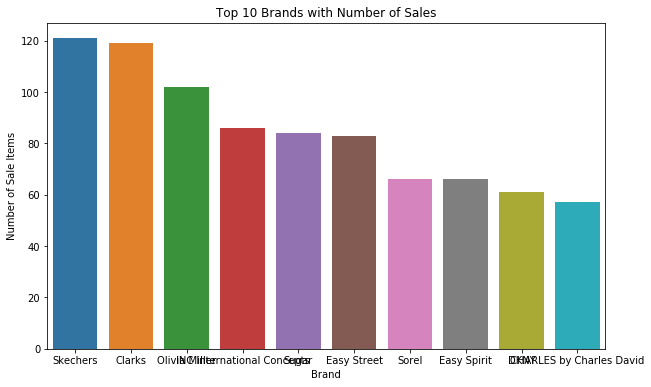

In [37]:
sns.barplot(sale_brand.brand, sale_brand.num_of_sales).set(title = 'Top 10 Brands with Number of Sales', xlabel = 'Brand', 
                                                          ylabel = 'Number of Sale Items')
fig = plt.gcf()
fig.set_size_inches(10, 6)


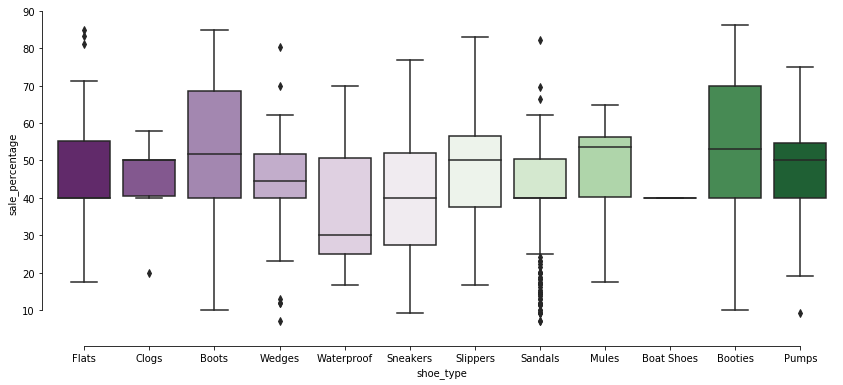

In [19]:
sns.boxplot(x="shoe_type", y="sale_percentage", data=sale, palette="PRGn")
sns.despine(offset=10, trim=True)
fig = plt.gcf()
fig.set_size_inches(14, 6)

In [56]:
price = shoes[['brand', 'price']]
brand_price = price.groupby('brand').mean()
brand_price['price'] = round(brand_price['price'], 2)
brand_price['ave_price'] = brand_price['price']
brand_price['brand'] = brand_price.index
brand_price = brand_price.drop(['price'], axis = 1)
brand_price = brand_price.sort_values('ave_price', ascending = False)
brand_price.reset_index(inplace = True, drop = True)
brand_price = brand_price.head(15)
brand_price

,ave_price,brand
0,246.17,Frye
1,229.75,VHNY
2,229.00,Badgley Mischka
3,219.59,Charles David
4,216.38,BCBGMAXAZRIA
5,206.62,Gentle Souls
6,206.39,Vintage Foundry Co
7,180.00,Eileen Fisher
8,170.56,Camper
9,164.53,Harley Davidson


In [80]:
review = shoes[['brand', 'description', 'num_review', 'rating']]
review = review[review['num_review'] != 0]
review.shape

(7047, 4)

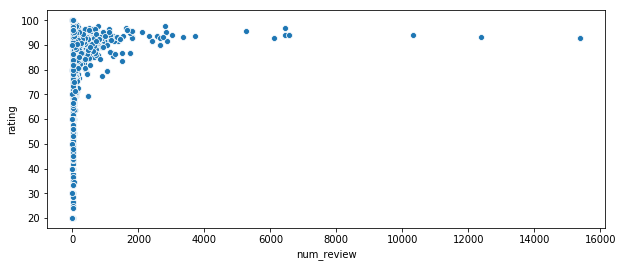

In [66]:
sns.scatterplot(x = 'num_review', y = 'rating', data = review)
fig = plt.gcf()
fig.set_size_inches(10, 4)

In [73]:
sum_review = pd.DataFrame(review.groupby('brand')['num_review'].sum())
sum_review['brand'] = sum_review.index
sum_review = sum_review.sort_values('num_review', ascending = False).head(15)
sum_review.reset_index(inplace = True, drop = True)
sum_review

,num_review,brand
0,61719,UGG®
1,56100,Crocs
2,47127,adidas
3,27097,Sorel
4,22955,Skechers
5,21421,Teva
6,16059,adidas Originals
7,14114,Brooks
8,10475,Timberland
9,8817,Clarks


In [82]:
list = ['UGG®', 'Crocs', 'adidas', 'Sorel', 'Skechers', 'Teva', 'adidas Originals', 'Brooks', 'Timberland', 'Clarks', 
       'INC International Concepts', 'Reebok', 'Naturalizer', 'Style & Co']

top15 = review[review['brand'].isin(list)]
top15.shape

(1159, 4)

In [83]:
top15.head(5)

,brand,description,num_review,rating
0,Naturalizer,Emiline-L Slip-ons,2,70.00
7,Skechers,Women's Cleo - Crave Casual Ballet Flats from...,42,87.62
8,INC International Concepts,"INC Kylan Ankle-Strap Flat Espadrilles, Creat...",3,100.00
9,Clarks,Women's Collection Sara Orchid Shoes,5,92.00
13,INC International Concepts,"INC Jenaya Square-Toe Flats, Created for Macy's",1,100.00


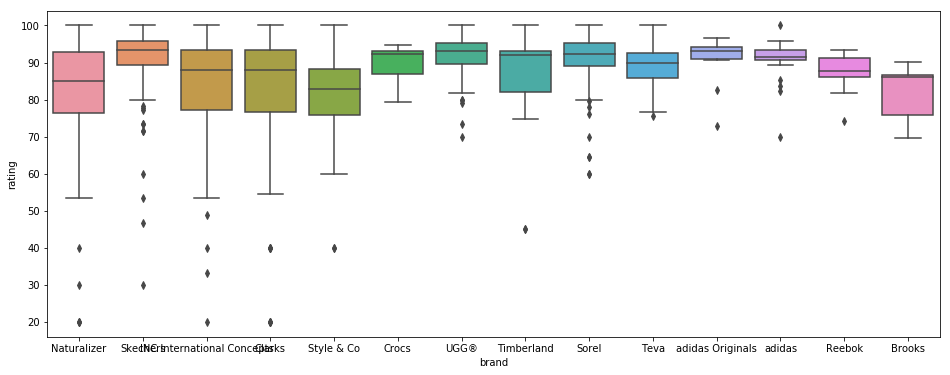

In [86]:
sns.boxplot(x="brand", y="rating", data=top15)
fig = plt.gcf()
fig.set_size_inches(16, 6)

In [88]:
shoes[shoes.num_review == shoes.num_review.max()]

,brand,description,num_review,price,rating,sale_price,shoe_type,sale_percentage
225,Crocs,Men's and Women's Classic Clogs from Finish Line,15378,50.0,92.73,50.0,Clogs,0.0
1792,Crocs,Men's and Women's Classic Clogs from Finish Line,15378,50.0,92.73,50.0,Waterproof,0.0
